# ESERCIZIO 1



This dataset contains the chemical fingerprint of different samples of glass belonging to different classes.
The study of classification of types of glass was motivated by criminological investigation. At the scene of the
crime, the glass left can be used as evidence. If it is correctly identified!

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('sample_data/glass.csv', names=['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe','Type'])
data.head()


,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


## PUNTO 1

Extract the samples of type class 1 (building windows float processed) and 7 (headlamps). How many
samples belong to the two groups?

In [4]:
# Filter samples for class 1 and class 7
class_1_samples = data[data['Type'] == 1]
class_7_samples = data[data['Type'] == 7]

# Count the number of samples in each group
num_class_1_samples = len(class_1_samples)
num_class_7_samples = len(class_7_samples)

# Display the results
print(f"Number of samples for class 1 (building windows float processed): {num_class_1_samples}")
print(f"Number of samples for class 7 (headlamps): {num_class_7_samples}")

Number of samples for class 1 (building windows float processed): 70
Number of samples for class 7 (headlamps): 29


## PUNTO 2

Normalize the data so that each feature has zero mean and unitary standard deviation.

In [8]:
data_mean = data.mean() #Calculates the mean (average) value for each column in the DataFrame data.
data_std = data.std() #Standard deviation -> indicatore usato per fornire una stima sintetica della variabilità
                        #di una popolazione di dati o di una variabile casuale
data_normalized = (data - data_mean) / data_std

data_normalized.describe()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,214.000000
mean,-6.640586e-17,-2.870393e-14,2.141589e-15,-1.992176e-16,-3.320293e-16,9.504339e-16,4.772921e-17,-2.988264e-16,-3.320293e-17,-4.565403e-17,0.000000
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000
min,-1.719943e+00,-2.375945e+00,-3.279254e+00,-1.861147e+00,-2.313192e+00,-3.667872e+00,-7.621317e-01,-2.478273e+00,-3.520514e-01,-5.850791e-01,-0.846290
25%,-8.599716e-01,-6.068499e-01,-6.127214e-01,-3.948486e-01,-5.105589e-01,-4.789059e-01,-5.743035e-01,-5.037845e-01,-3.520514e-01,-5.850791e-01,-0.846290
50%,0.000000e+00,-2.257001e-01,-1.320720e-01,5.514857e-01,-1.700615e-01,1.795445e-01,8.884491e-02,-2.508251e-01,-3.520514e-01,-5.850791e-01,-0.370946
75%,8.599716e-01,2.608215e-01,5.108348e-01,6.346799e-01,3.707284e-01,5.636406e-01,1.731759e-01,1.514506e-01,-3.520514e-01,4.412072e-01,0.104398
max,1.719943e+00,5.125215e+00,4.864232e+00,1.251704e+00,4.116199e+00,3.562172e+00,8.759606e+00,5.082401e+00,5.983182e+00,4.648981e+00,2.005775


## PUNTO 3

Perform PCA on the dataset (do not consider the ”Id” as a feature!) by means of the SVD decomposition.
Then, plot the trend of the singular values $σ_k$, the cumulate fraction of singular values $P_k = \frac{\sum_{i=1}^{k} \sigma_i}{\sum_{i=1}^{q} \sigma_i}$, the fraction of the "explained variance" $\frac{\sum_{i=1}^{k} \sigma_i^2}{\sum_{i=1}^{q} \sigma_i^2} $


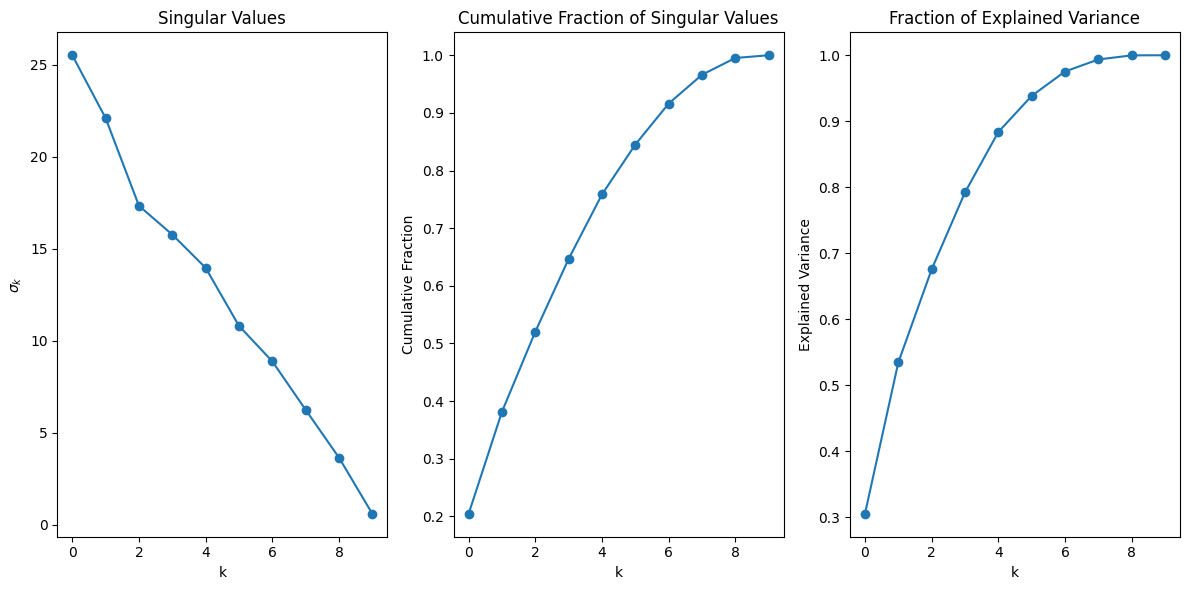

In [33]:
import numpy as np
import matplotlib.pyplot as plt


# Extract features for PCA (excluding 'Id' column)
X = data_normalized.iloc[:, 1:].to_numpy()

# Perform SVD
U, S, Vt = np.linalg.svd(X, full_matrices=False)

# Calculate singular values, cumulative fraction, and explained variance
singular_values = S
cumulative_fraction = np.cumsum(singular_values) / np.sum(singular_values)
explained_variance = np.cumsum(singular_values**2) / np.sum(singular_values**2)

# Plot the trends
plt.figure(figsize=(12, 6))

# Plot singular values
plt.subplot(1, 3, 1)
plt.plot(singular_values, marker='o')
plt.title('Singular Values')
plt.xlabel('k')
plt.ylabel('$σ_k$')

# Plot cumulative fraction of singular values
plt.subplot(1, 3, 2)
plt.plot(cumulative_fraction, marker='o')
plt.title('Cumulative Fraction of Singular Values')
plt.xlabel('k')
plt.ylabel('Cumulative Fraction')

# Plot fraction of explained variance
plt.subplot(1, 3, 3)
plt.plot(explained_variance, marker='o')
plt.title('Fraction of Explained Variance')
plt.xlabel('k')
plt.ylabel('Explained Variance')

plt.tight_layout()
plt.show()


## PUNTO 4

Compute a matrix containing the principal components associated with the dataset.

In [38]:
# Perform SVD on the normalized dataset
U, S, Vt = np.linalg.svd(X)

# Compute the matrix of principal components
principal_components_matrix = np.dot(np.diag(S), Vt)

# Display the matrix of principal components
print("Matrix of Principal Components:")
print(principal_components_matrix)

Matrix of Principal Components:
[[-6.51368789e+00  8.26163768e+00 -9.89768873e+00  1.12930439e+01
   3.11757424e+00  1.73638242e+00 -4.34634520e+00  1.00734991e+01
  -4.10847404e+00  1.28328651e+01]
 [ 1.23271033e+01  8.79111807e-01 -8.41587367e+00 -1.34247333e+00
  -5.29825682e+00 -5.85883228e+00  1.28053912e+01  4.15452396e+00
   1.61760196e+00  4.05503578e+00]
 [-1.59598149e+00  6.06381487e+00  4.33265443e-01 -6.20340095e+00
   8.21033184e+00 -1.13278700e+01 -1.00097715e-02 -2.07988231e+00
  -4.64626427e+00  7.59235336e-01]
 [-2.27222166e+00 -8.27062690e+00 -5.19550301e+00  1.67791306e+00
   1.00347824e+01  1.03659470e+00  4.24302184e+00 -2.91816970e+00
   3.94370076e+00  1.09971302e+00]
 [ 1.03721310e+00 -2.14929133e+00 -1.64516540e+00 -2.50911048e-01
  -1.66024855e-01  4.31025848e+00  2.60611015e+00 -3.57942756e+00
  -1.21660034e+01  1.16654123e-01]
 [-1.00693924e+00  5.42257484e+00 -2.21082942e+00 -5.87763928e-01
  -1.19755340e+00  2.79180089e+00  1.32882702e+00 -7.60598033e+00
 

## PUNTO 5

Generate a scatterplot of the first two principal components of the dataset, grouped by label.

In [46]:
# Calculate the first two principal components using inner product
x = np.inner(X, principal_components_matrix[0, :])
y = np.inner(X, principal_components_matrix[1, :])

print(x)

[-39.55409376  -9.99248806  -5.19333025 -20.61471261 -17.84691789
 -22.07367311 -19.87480946 -23.4121948  -15.31762247 -23.96077846
 -20.78566625 -24.29337389 -22.46880318 -28.65143759 -23.5735144
 -22.83894562 -28.51300533 -37.33832862 -24.88285675 -15.01538833
 -27.17656444 -38.34726328 -24.52943515 -21.50583804 -19.63278457
 -22.84297728 -17.50587609 -19.68075956 -21.70427163 -20.90827264
 -30.54511809 -24.41753623 -31.30176655 -23.58377288 -24.33009522
 -16.27199579 -17.88725139 -23.04621866 -48.25361484 -48.25361484
 -27.78731757 -24.47498749 -18.40319077 -47.92761181 -39.17464902
 -22.94982116 -31.48511649 -59.98967219 -51.43951366 -22.91402075
 -62.29161068 -30.27778754 -17.52618994 -18.92248582 -19.74212939
 -29.96759628 -25.20354549 -23.05050213 -18.52008387 -24.6586222
 -25.9147819   -9.81225599 -49.60331282 -44.22789078 -46.40581664
 -33.55796914 -54.46573931 -54.06323577 -52.05937365 -51.84668854
  10.10908275 -30.10491981  -2.69993612  -0.98626733  -2.85464959
  -3.7646319

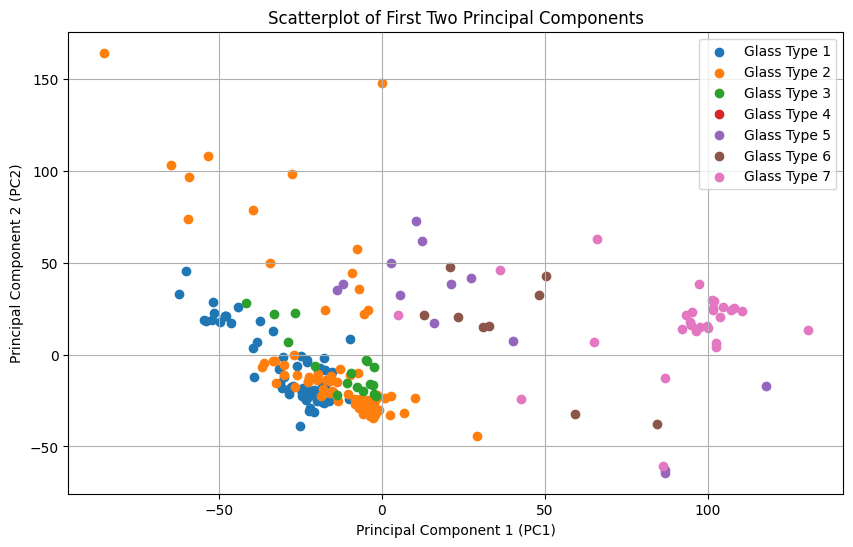

In [44]:
# Calculate the first two principal components using inner product
x = np.inner(X, principal_components_matrix[0, :])
y = np.inner(X, principal_components_matrix[1, :])
# Create an array with the principal components and 'Type' column
pc_array = np.column_stack((x, y, data['Type']))

# Plot the scatterplot with different colors for each glass type
plt.figure(figsize=(10, 6))
for glass_type in range(1, 8):
    subset = pc_array[pc_array[:, -1] == glass_type]
    plt.scatter(subset[:, 0], subset[:, 1], label=f'Glass Type {glass_type}')

plt.title('Scatterplot of First Two Principal Components')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend()
plt.grid(True)
plt.show()

## PUNTO 6

Consider now the first principle component. By looking at the components of the first principal direction,
do you expect building windows float processed glasses to have a large or small concentration of magnesium
and aluminium, respectively? And what about headlamps glasses?

Regarding Magnesium it has a negative influence on both directions of the principal components. Headlamps have high value on the first principal component and slightly lower on the second. So it is likely that it has a low concentration of magnesium. Building windows float processed glasses presents the opposite situation, having slighly negative values in the two pricipal components direction. This may suggest an higher value in the presence of magnesium.

Regarding alluminium it mainly influence positively the position along the first principal component. Headlamps having an high value along the first component direction are likely to have an higher than average presence of alluminium. Building windows float processed glasses having a slightly negative value along the first component direction are likely to have an lower than average presence of alluminium.

In [51]:
print(principal_components_matrix[0, 2:4])
print(principal_components_matrix[1, 2:4])

[-9.89768873 11.29304385]
[-8.41587367 -1.34247333]
[[-6.51368789e+00  8.26163768e+00 -9.89768873e+00  1.12930439e+01
   3.11757424e+00  1.73638242e+00 -4.34634520e+00  1.00734991e+01
  -4.10847404e+00  1.28328651e+01]
 [ 1.23271033e+01  8.79111807e-01 -8.41587367e+00 -1.34247333e+00
  -5.29825682e+00 -5.85883228e+00  1.28053912e+01  4.15452396e+00
   1.61760196e+00  4.05503578e+00]
 [-1.59598149e+00  6.06381487e+00  4.33265443e-01 -6.20340095e+00
   8.21033184e+00 -1.13278700e+01 -1.00097715e-02 -2.07988231e+00
  -4.64626427e+00  7.59235336e-01]
 [-2.27222166e+00 -8.27062690e+00 -5.19550301e+00  1.67791306e+00
   1.00347824e+01  1.03659470e+00  4.24302184e+00 -2.91816970e+00
   3.94370076e+00  1.09971302e+00]
 [ 1.03721310e+00 -2.14929133e+00 -1.64516540e+00 -2.50911048e-01
  -1.66024855e-01  4.31025848e+00  2.60611015e+00 -3.57942756e+00
  -1.21660034e+01  1.16654123e-01]
 [-1.00693924e+00  5.42257484e+00 -2.21082942e+00 -5.87763928e-01
  -1.19755340e+00  2.79180089e+00  1.32882702e+

# ESERCIZIO 2

Consider the following function (where $x = (x, y)$):

$f(x) = (x + 2y − 7)^2 + (2x + y − 5)^2$

## PUNTO 1

Plot the function.

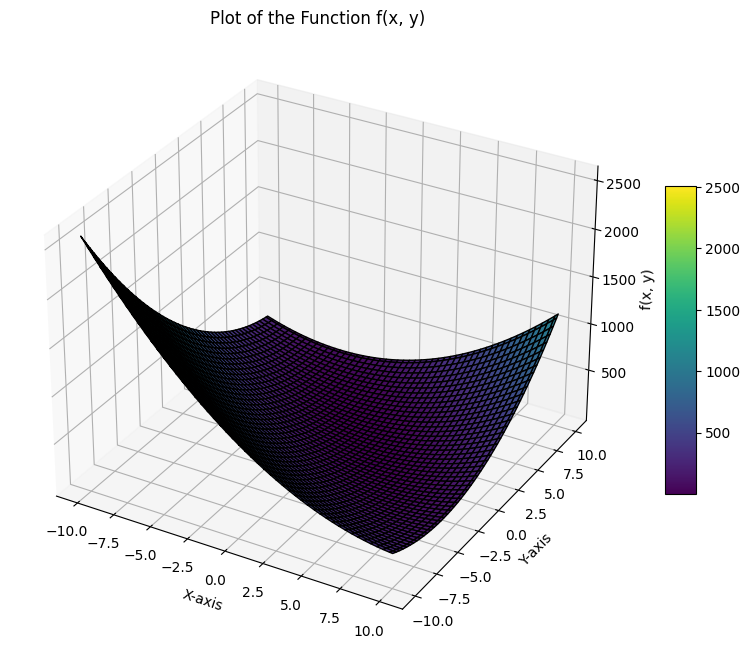

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function
def f(x, y):
    return (x + 2*y - 7)**2 + (2*x + y - 5)**2

# Create a meshgrid of x and y values
x_values = np.linspace(-10, 10, 100)
y_values = np.linspace(-10, 10, 100)
x_mesh, y_mesh = np.meshgrid(x_values, y_values)

# Compute the function values for each (x, y) pair
z_values = f(x_mesh, y_mesh)

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surface = ax.plot_surface(x_mesh, y_mesh, z_values, cmap='viridis', edgecolor='k')

# Add labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('f(x, y)')
ax.set_title('Plot of the Function f(x, y)')

# Add a colorbar
fig.colorbar(surface, ax=ax, shrink=0.5, aspect=10)

# Show the plot
plt.show()


## PUNTO 2

Compute analitically the value $x_\text{min}$ where the function attains its minimum value and $f(x_\text{min})$.

To find the minimum value of $f(x, y)$, is possible to take the partial derivates with respect to $x$ and $y$, set them equal to zero, and solve the resulting system.

- Let's denote $f(x, y)$ as $f$, and calculate the partial derivatives:

  $\frac{\partial f}{\partial x} = 2(x + 2y - 7) + 4(2x + y - 5)$

  $\frac{\partial f}{\partial y} = 4(x + 2y - 7) + 2(2x + y - 5)$

- Setting these derivatives equal to zero gives a system of equations:

  $\begin{align*}
2(x + 2y - 7) + 4(2x + y - 5) &= 0 \\
4(x + 2y - 7) + 2(2x + y - 5) &= 0
\end{align*}$

- Now, let's solve this system of equations:

    \begin{align*}
    10x + 8y - 34 &= 0 \\
    8x + 10y - 38 &= 0
    \end{align*}

- Now, we can solve this system of equations to find $x_\text{min}$ and $y_\text{min}$ .

  1. Multiply the first equation by 5 and the second equation by 4:

    \begin{align*}
    50x + 40y - 170 &= 0 \\
    32x + 40y - 152 &= 0
    \end{align*}

  2. Subtract the second equation from the first:

    $18x - 18 = 18x - 18 = 0$

      we can see that $x=1$.

  3. Express $y$ in terms of $x$ using the first equation:

    \begin{align*}
    10x + 8y - 34 &= 0 \\
    8y &= -10x + 34 \\
    y &= 3
    \end{align*}
  4. Plug these values into the original function to find $f_\text{min} = f(x_\text{min},y_\text{min})$:

    $f(x_{\text{min}}, y_{\text{min}}) = f(1, 3) = 0$

    $f_{\text{min}} = 0$




x_min: 1, y_min: 3
f_min: 0


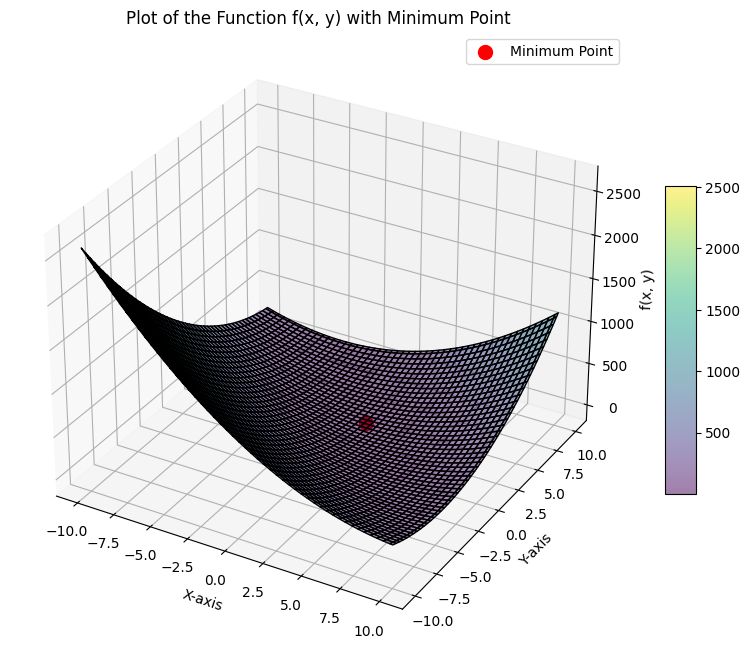

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import sympy as sym

# Define symbols
sx, sy = sym.symbols('sx sy')

# Define equations
equation1 = sym.Eq(50*sx + 40*sy - 170, 0)
equation2 = sym.Eq(32*sx + 40*sy - 152, 0)

# Solve the system of equations
solution = sym.solve((equation1, equation2), (sx, sy), dict=True)

# Print the solutions
for sol in solution:
    print(f"x_min: {sol[sx]}, y_min: {sol[sy]}")

# You can also substitute the solutions into the original equations
fmin = (sx + 2*sy - 7)**2 + (2*sx + sy - 5)**2
for sol in solution:
    f_value = fmin.subs({sx: sol[sx], sy: sol[sy]})
    print(f"f_min: {f_value}")

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the function surface
x_values = np.linspace(-10, 10, 100)
y_values = np.linspace(-10, 10, 100)
x_mesh, y_mesh = np.meshgrid(x_values, y_values)
z_values = f(x_mesh, y_mesh)
surface = ax.plot_surface(x_mesh, y_mesh, z_values, cmap='viridis', edgecolor='k', alpha=0.5)

# Plot the point (x_min, y_min, f_min) on the surface
ax.scatter([sol[sx]], [sol[sy]], [f_value], color='red', s=100, label='Minimum Point')

# Add labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('f(x, y)')
ax.set_title('Plot of the Function f(x, y) with Minimum Point')

# Add a colorbar
fig.colorbar(surface, ax=ax, shrink=0.5, aspect=10)

# Show the plot
plt.legend()
plt.show()


## PUNTO 3

Implement the gradient descent (GD) method.

In [64]:
def gradient_descent(f, x0, alpha, epsilon, max_iterations=200):
    x = x0
    df = jax.jit(jax.grad(f, argnums=0))
    iteration = 0
    E_values = []  # List to store the convergence history

    while iteration < max_iterations:
        x_previous = x
        gradient = df(x)
        x = x - alpha * gradient
        E = np.abs(f(x) - f(x_previous))
        E_values.append(E)
        iteration += 1

        if E < epsilon:
            break

    return x, E_values


## PUNTO 4

Apply the GD method with ϵ = 10e-3, α = 0.01 and 0.1. Plot the convergence history and comment the results.

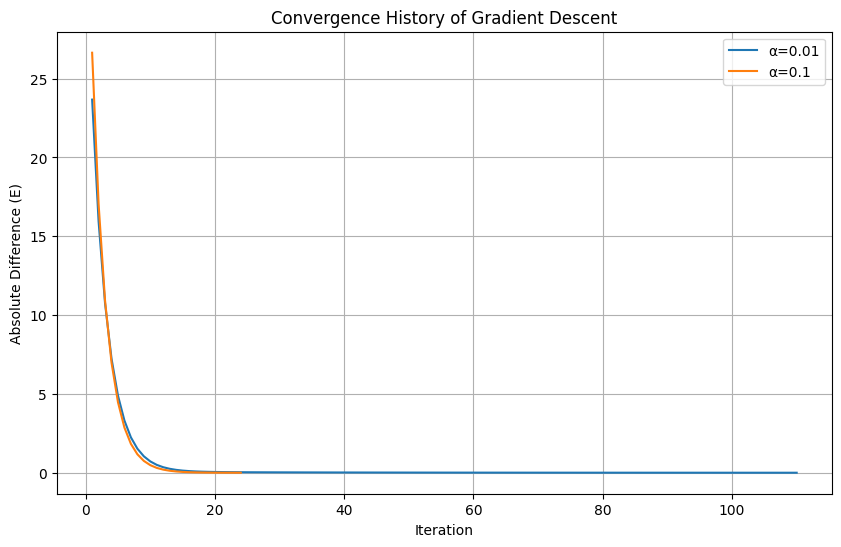

In [65]:
# Define the function and its gradient
def f(x):
    return (x[0] + 2*x[1] - 7)**2 + (2*x[0] + x[1] - 5)**2

# Initial guess and hyperparameters
initial_guess = np.array([0.0, 0.0])
tolerance = 1e-3
learning_rates = [0.01, 0.1]

# Run gradient descent for each learning rate
plt.figure(figsize=(10, 6))
for alpha in learning_rates:
    result, convergence_history = gradient_descent(f, initial_guess, alpha, tolerance)
    iterations = len(convergence_history)
    plt.plot(range(1, iterations + 1), convergence_history, label=f'α={alpha}')

plt.title('Convergence History of Gradient Descent')
plt.xlabel('Iteration')
plt.ylabel('Absolute Difference (E)')
plt.legend()
plt.grid(True)
plt.show()

## PUNTO 5

Implement the GD with momentum (GDM), where α is the learning rate and β is the momentum coefficient. Use the same stopping criterium used in
the GD method.


In [62]:
import jax
import jax.numpy as jnp
def gradient_descent_momentum(f, x0, alpha, beta, epsilon, max_iterations=200):
    df = jax.jit(jax.grad(f, argnums=0))
    x = x0
    z = np.zeros_like(x)
    iteration = 0
    E_values = []  # List to store the convergence history
    x_history = [x.copy()]  # List to store the path taken by GDM

    while iteration < max_iterations:
        x_previous = x.copy()
        gradient = df(x)
        z = beta * z + gradient
        x = x - alpha * z
        E = np.abs(f(x) - f(x_previous))
        E_values.append(E)
        iteration += 1
        x_history.append(x.copy())

        if E < epsilon:
            break

    return x, E_values, x_history

Apply the GDM method with ϵ = 10−3
, α = 0.01, 0.1 and β = 0.5, 0.9. Plot the convergence history and
comment the results.

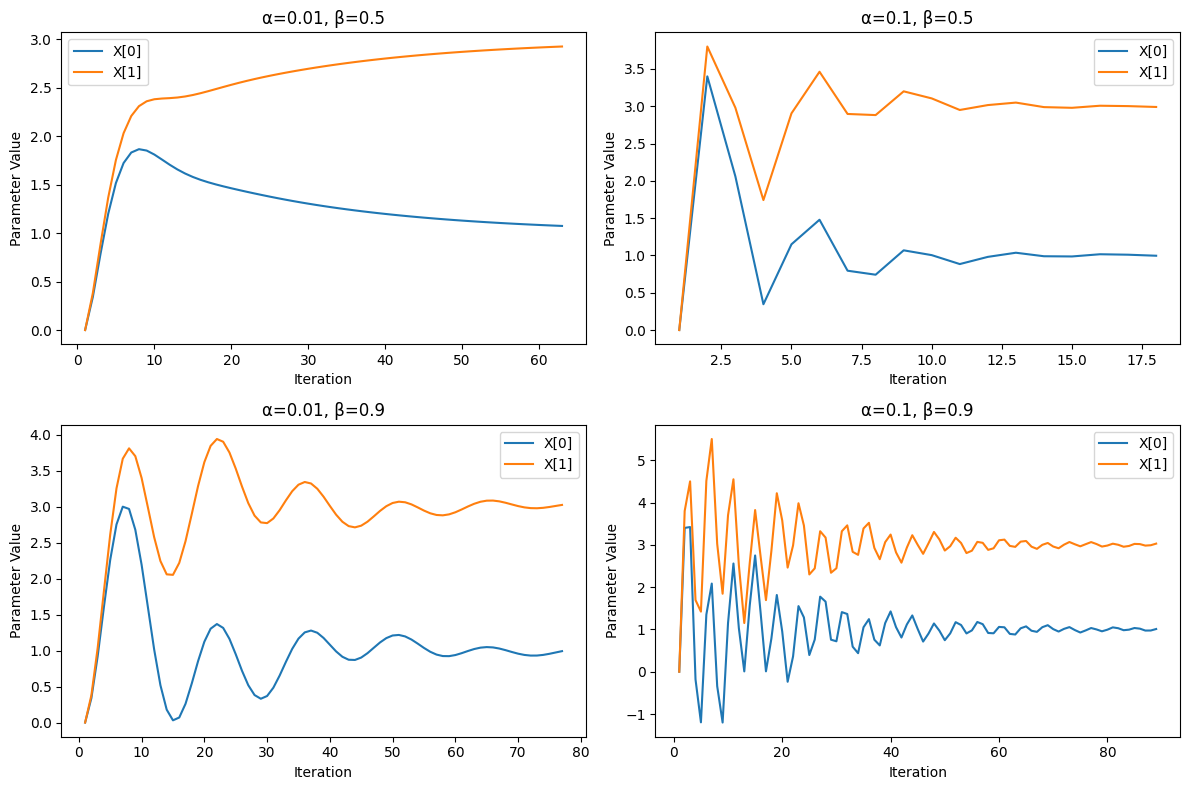

In [63]:
# Define the function and its gradient
def f(x):
    return (x[0] + 2*x[1] - 7)**2 + (2*x[0] + x[1] - 5)**2

# Initial guess and hyperparameters
initial_guess = np.array([0.0, 0.0])
tolerance = 1e-3
learning_rates = [0.01, 0.1]
momentum_coefficients = [0.5, 0.9]

# Run GDM for each combination of alpha and beta
fig, axes = plt.subplots(nrows=len(momentum_coefficients), ncols=len(learning_rates), figsize=(12, 8))

for i, beta in enumerate(momentum_coefficients):
    for j, alpha in enumerate(learning_rates):
        result, _, x_history = gradient_descent_momentum(f, initial_guess, alpha, beta, tolerance)
        x_history = np.array(x_history)

        ax = axes[i, j]
        ax.plot(range(1, len(x_history) + 1), x_history[:, 0], label='X[0]')
        ax.plot(range(1, len(x_history) + 1), x_history[:, 1], label='X[1]')
        ax.set_title(f'α={alpha}, β={beta}')
        ax.set_xlabel('Iteration')
        ax.set_ylabel('Parameter Value')
        ax.legend()

plt.tight_layout()
plt.show()

The results show that momentum can significantly improve the convergence of gradient descent. In the first plot, which uses a learning rate of 0.01 and momentum coefficient of 0.5, the convergence is slow and noisy. In the second plot, which uses a learning rate of 0.1 and momentum coefficient of 0.9, the convergence is significantly faster and smoother. The third and fourth plots use the same learning rate of 0.1, but with different momentum coefficients of 0.5 and 0.9, respectively. The third plot shows that a momentum coefficient of 0.9 leads to faster convergence than a coefficient of 0.5. The fourth plot shows that the convergence is very similar for both momentum coefficients.

Overall, the results of these experiments show that momentum can be a very effective way to improve the convergence of gradient descent. A momentum coefficient of 0.9 is generally a good choice, but a coefficient of 0.5 may be sufficient for some problems.

# ESERCIZIO 3

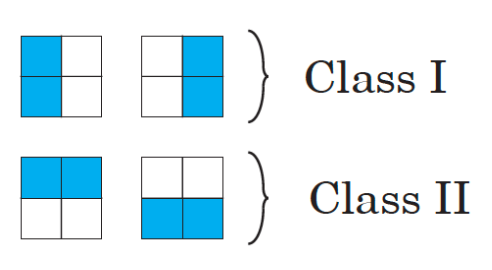

**1. Are these categories linearly separable ?**

  No, the two classes of patterns represented by the red dots (Class I) and blue dots (Class II) in the image are not linearly separable. This means that there not exists a straight line that can perfectly separate the two classes.

In [79]:
##    METHOD 1

from sklearn import svm

# Define the data points for two classes
C1 = [[1, 0, 1, 0], [0, 1, 0, 1]]
C2 = [[1, 1, 0, 0], [0, 0, 1, 1]]

# Create labels for the classes
y = [1] * len(C1) + [-1] * len(C2)

# Combine data points and labels
X = C1 + C2

# Create an SVM classifier
clf = svm.SVC(kernel='linear')

# Train the classifier
clf.fit(X, y)

# Check if the classifier successfully created a separating hyperplane
linearly_separable = clf.score(X, y) == 1.0

print('>>> The categories are linearly separable:', linearly_separable)


>>> The categories are linearly separable: False


In [78]:
##    METHOD 2

import numpy as np

def is_linearly_separable(data1, data2):
    # Combine the data arrays
    data_combined = np.vstack([data1, data2])

    # Add a column of ones for the bias term
    data_combined = np.hstack([data_combined, np.ones((data_combined.shape[0], 1))])

    # Create labels for the two classes (1 for data1, -1 for data2)
    labels = np.ones(len(data_combined))
    labels[len(data1):] = -1

    # Use the pseudo-inverse to find weights for the hyperplane
    try:
        weights = np.linalg.pinv(data_combined) @ labels
    except np.linalg.LinAlgError:
        return False  # The pseudo-inverse doesn't exist

    # Check if the weights correctly classify all points
    predictions = np.sign(data_combined @ weights)
    return np.all(predictions == labels)

# Load the data
data1 = np.array([[1, 1], [1, 2], [2, 1], [2, 2]])
data2 = np.array([[1, 0], [1, 1], [2, 0], [2, 1]])

# Check if the classes are linearly separable
is_separable = is_linearly_separable(data1, data2)
print("The two classes are linearly separable:", is_separable)


The two classes are linearly separable: False


**2. Design a multilayer network to distinguish these categories.**

In [69]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def initialize_weights_and_biases(input_size, hidden_size, output_size):
    np.random.seed(42)
    weights_input_hidden = np.random.rand(input_size, hidden_size)
    biases_hidden = np.zeros((1, hidden_size))
    weights_hidden_output = np.random.rand(hidden_size, output_size)
    biases_output = np.zeros((1, output_size))
    return weights_input_hidden, biases_hidden, weights_hidden_output, biases_output

def forward_propagation(X, weights_input_hidden, biases_hidden, weights_hidden_output, biases_output):
    hidden_input = np.dot(X, weights_input_hidden) + biases_hidden
    hidden_output = sigmoid(hidden_input)
    output_layer_input = np.dot(hidden_output, weights_hidden_output) + biases_output
    predicted_output = sigmoid(output_layer_input)
    return hidden_input, hidden_output, output_layer_input, predicted_output

def backpropagation(X, y, hidden_output, output_layer_input, predicted_output,
                    weights_hidden_output, biases_output, weights_input_hidden, biases_hidden, learning_rate):
    output_error = y - predicted_output
    output_delta = output_error * sigmoid_derivative(predicted_output)

    hidden_error = output_delta.dot(weights_hidden_output.T)
    hidden_delta = hidden_error * sigmoid_derivative(hidden_output)

    weights_hidden_output += hidden_output.T.dot(output_delta) * learning_rate
    biases_output += np.sum(output_delta, axis=0, keepdims=True) * learning_rate

    weights_input_hidden += X.T.dot(hidden_delta) * learning_rate
    biases_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate

def train_neural_network(X, y, hidden_size, learning_rate, epochs):
    input_size = X.shape[1]
    output_size = 1

    weights_input_hidden, biases_hidden, weights_hidden_output, biases_output = \
        initialize_weights_and_biases(input_size, hidden_size, output_size)

    for epoch in range(epochs):
        hidden_input, hidden_output, output_layer_input, predicted_output = \
            forward_propagation(X, weights_input_hidden, biases_hidden, weights_hidden_output, biases_output)

        backpropagation(X, y, hidden_output, output_layer_input, predicted_output,
                        weights_hidden_output, biases_output, weights_input_hidden, biases_hidden, learning_rate)

        if epoch % 1000 == 0:
            loss = np.mean(np.square(y - predicted_output))
            print(f'Epoch {epoch}, Loss: {loss}')

    return weights_input_hidden, biases_hidden, weights_hidden_output, biases_output

# Example usage:
X_train = np.array([[1, 0, 1, 0], [0, 1, 0, 1]])
y_train = np.array([[0], [1]])

trained_weights_input_hidden, trained_biases_hidden, \
trained_weights_hidden_output, trained_biases_output = \
    train_neural_network(X_train, y_train, hidden_size=4, learning_rate=0.01, epochs=10000)

# Function to predict using the trained neural network
def predict(X, weights_input_hidden, biases_hidden, weights_hidden_output, biases_output):
    _, _, _, predicted_output = \
        forward_propagation(X, weights_input_hidden, biases_hidden, weights_hidden_output, biases_output)
    return predicted_output

# Example usage:
X_test = np.array([[1, 1, 0, 0], [0, 0, 1, 1]])

# Predict using the trained neural network
predictions = predict(X_test, trained_weights_input_hidden, trained_biases_hidden,
                      trained_weights_hidden_output, trained_biases_output)

# Print the predictions
print("Predictions:")
print(predictions)

# Determine if the categories are linearly separable based on predictions
linearly_separable = all(pred >= 0.5 for pred in predictions) or all(pred < 0.5 for pred in predictions)
print("Are these categories linearly separable?", linearly_separable)



Epoch 0, Loss: 0.33155597378080975
Epoch 1000, Loss: 0.25212230889422993
Epoch 2000, Loss: 0.24371250396998478
Epoch 3000, Loss: 0.22774630236073337
Epoch 4000, Loss: 0.19210366180144667
Epoch 5000, Loss: 0.13253163167491738
Epoch 6000, Loss: 0.0778972102152409
Epoch 7000, Loss: 0.046395727940974935
Epoch 8000, Loss: 0.030163655345180347
Epoch 9000, Loss: 0.021298772178344114
Predictions:
[[0.44656306]
 [0.55172335]]
Are these categories linearly separable? False


The two values inside the "predictions" matrix represent the output of the neural network for the corresponding input patterns. In this case, the matrix has a shape of (2, 1), indicating two predictions for two input patterns.

The first value, 0.44656306, represents the predicted output for the first input pattern [1, 1, 0, 0].

The second value, 0.55172335, represents the predicted output for the second input pattern [0, 0, 1, 1].

The variable linearly_separable is determined based on whether all predictions are consistently above or below a threshold of 0.5. If all predictions are greater than or equal to 0.5 or all predictions are less than 0.5, the categories are considered linearly separable. Otherwise, they are considered not linearly separable.